In [1]:
import numpy as np
from numpy import array
import math

import pandas as pd 
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
import tensorflow.keras.layers as KL

from matplotlib import pyplot

In [2]:
input_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/input2.csv', index_col = 0)
input_data.index.name = 'Timestamp (seconds)'

In [3]:
output_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/output2.csv', index_col = 0)
output_data.index.name = 'Timestamp (seconds)'

In [4]:
#input_data = input_data.iloc[:,1:]
#output_data = output_data.iloc[:,1:]

In [5]:
split_columns = 1

In [6]:
output_data2 = np.array(output_data)
print(output_data2.shape)

Y = list()

for i in range((int(split_columns/2)),output_data2.shape[0], split_columns):
    Y.append(output_data2[i])

Y = array(Y)
print(Y.shape)

#DECODING Y
# integer encode direction
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
print(Y.shape)

(30929, 1)
(30929, 1)
(30929,)


C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [7]:
#Modifying the output_data to, putting to Y in array
#1 0 0 for normal
#0 1 0 for drowsy
#0 0 1 for aggressive

#output_data = np.array(output_data)

#Y = list()

#for i in range(int(output_data.shape[0]/split_columns)):
#    condition = output_data[(i*split_columns)]    
#    behavior = []
#    if(condition=='DROWSY'):
#        behavior = [0,1,0]
#    elif(condition=='AGGRESSIVE'):
#        behavior = [0,0,1]
#    else:
#        behavior = [1,0,0]
    
#    Y.append(behavior)

#Y = array(Y)
#print(Y.shape)

In [8]:
#min max scaler
X = input_data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(30929, 34)
(30929,)


In [9]:
#USE THIS IF MINMAX SCALER IS NOT USED
#X = np.array(X)
#X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1]))
#print(X.shape)

In [10]:
#RESHAPING X
X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1]))
print(X.shape)

(30929, 1, 34)


In [11]:
#SPLITTING TRAINING AND TEST DATA METHOD 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [12]:
#SPLITTING TRAINING AND TEST DATA METHOD 2
#X_train = X[:(int(X.shape[0] * 0.8)),:,:]
#X_test = X[(int(X.shape[0] * 0.8)):,:,:]
print(X_train.shape)
print(X_test.shape)
#Y_train = Y[:(int(Y.shape[0] * 0.8)),:]
#Y_test = Y[(int(Y.shape[0] * 0.8)):,:]
print(Y_train.shape)
print(Y_test.shape)

(24743, 1, 34)
(6186, 1, 34)
(24743,)
(6186,)


In [13]:
#MAKING SURE DATA TYPE ARE CORRECT
X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')

In [47]:
#NEURAL NETWORK

In [48]:
#RESHAPING X_TRAIN
#nsamples, nx, ny = X_train.shape
#X_train2 = X_train.reshape((nsamples,nx*ny))
#THIS NUMBER IS THE INPUT LAYER (23200)
#print(X_train2.shape)

In [49]:
#RESHAPING X_TEST
#nsamples, nx, ny = X_test.shape
#X_test2 = X_test.reshape((nsamples,nx*ny))

In [14]:
## Model
inputs = KL.Input(shape=(split_columns, X_train.shape[2]))
print(inputs)

Tensor("input_1:0", shape=(None, 1, 34), dtype=float32)


In [15]:
# For RNN
x = KL.SimpleRNN(100, activation ='relu')(inputs) 
print(x)

Tensor("simple_rnn/strided_slice_3:0", shape=(None, 100), dtype=float32)


In [16]:
outputs = KL.Dense(3, activation="softmax")(x)
print(outputs)

Tensor("dense/Softmax:0", shape=(None, 3), dtype=float32)


In [17]:
model = tf.keras.models.Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 34)]           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               13500     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 13,803
Trainable params: 13,803
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["acc"])
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
774/774 [==============================] - 1s 1ms/step - loss: 0.9487 - acc: 0.5096
Epoch 2/100
774/774 [==============================] - 1s 1ms/step - loss: 0.8344 - acc: 0.5771
Epoch 3/100
774/774 [==============================] - 1s 1ms/step - loss: 0.7805 - acc: 0.6010
Epoch 4/100
774/774 [==============================] - 1s 1ms/step - loss: 0.7442 - acc: 0.6269
Epoch 5/100
774/774 [==============================] - 1s 1ms/step - loss: 0.7178 - acc: 0.6429
Epoch 6/100
774/774 [==============================] - 1s 1ms/step - loss: 0.6950 - acc: 0.6617
Epoch 7/100
774/774 [==============================] - 1s 1ms/step - loss: 0.6790 - acc: 0.6706
Epoch 8/100
774/774 [==============================] - 1s 1ms/step - loss: 0.6618 - acc: 0.6833
Epoch 9/100
774/774 [==============================] - 1s 1ms/step - loss: 0.6450 - acc: 0.6927
Epoch 10/100
774/774 [==============================] - 1s 1ms/step - loss: 0.6299 - acc: 0.7008
Epoch 11/100
774/774 [=================

In [19]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Loss: {0} - Acc: {1}".format(test_loss, test_acc))

194/194 [==============================] - 0s 905us/step - loss: 0.3423 - acc: 0.8474
Loss: 0.34228432178497314 - Acc: 0.8473973274230957


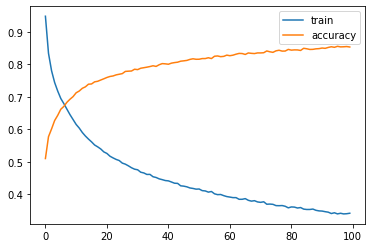

In [20]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['acc'], label='accuracy')
pyplot.legend()
pyplot.show()

In [325]:
#calling the neural network function, choose activation, solver, hidden layer, randomize data 
nn=MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(200,200,200),random_state=1,verbose = 1)

In [326]:
t1= datetime.now()
print('start time: ' + str(t1))
nn.fit(X_train2,Y_train)

start time: 2020-11-10 02:41:37.925546
Iteration 1, loss = 3.76620443
Iteration 2, loss = 1.67995336
Iteration 3, loss = 1.60279520
Iteration 4, loss = 1.58136921
Iteration 5, loss = 1.48383832


C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(200, 200, 200), random_state=1, verbose=3)

In [327]:
pred=nn.predict(X_test2)
t2= datetime.now()

In [328]:
count=0

for i in range(len(pred)):
    if(pred[i][0] == (Y_test[i][0]) and pred[i][1] == (Y_test[i][1]) and pred[i][2] == (Y_test[i][2]) ):
        count = count + 1
print('After the predictions has been estimated, the accuracy is ' + str((count/pred.shape[0])*100) + ' %')
print('Elapsed time: ' + str(t2-t1))

After the predictions has been estimated, the accuracy is 39.706896551724135 %
Elapsed time: 0:00:04.126958


In [322]:
nn.score(X_test2, Y_test)

0.7039655172413793

In [149]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh' , return_sequences=True, input_shape=(X.shape[1], X.shape[2]))) #100,34
model.add(LSTM(100, ))
#model.add(Dropout(0.2))
model.add(Dense(Y.shape[1])) #3
model.compile(optimizer='adam', loss='mae', metrics = ['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 100, 100)          54000     
_________________________________________________________________
lstm_35 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 303       
Total params: 134,703
Trainable params: 134,703
Non-trainable params: 0
_________________________________________________________________


In [150]:
# fit network
history = model.fit(X_train, Y_train, epochs=25, validation_data=(X_test, Y_test), verbose=1, shuffle=False)

Epoch 1/25
8/8 [==============================] - 1s 180ms/step - loss: 0.4103 - accuracy: 0.3233 - val_loss: 0.3537 - val_accuracy: 0.4138
Epoch 2/25
8/8 [==============================] - 1s 89ms/step - loss: 0.3509 - accuracy: 0.4397 - val_loss: 0.3576 - val_accuracy: 0.3966
Epoch 3/25
8/8 [==============================] - 1s 89ms/step - loss: 0.3472 - accuracy: 0.4655 - val_loss: 0.3486 - val_accuracy: 0.3621
Epoch 4/25
8/8 [==============================] - 1s 86ms/step - loss: 0.3394 - accuracy: 0.4612 - val_loss: 0.3510 - val_accuracy: 0.4138
Epoch 5/25
8/8 [==============================] - 1s 88ms/step - loss: 0.3367 - accuracy: 0.4784 - val_loss: 0.3465 - val_accuracy: 0.4310
Epoch 6/25
8/8 [==============================] - 1s 89ms/step - loss: 0.3358 - accuracy: 0.4612 - val_loss: 0.3503 - val_accuracy: 0.3621
Epoch 7/25
8/8 [==============================] - 1s 90ms/step - loss: 0.3337 - accuracy: 0.4828 - val_loss: 0.3509 - val_accuracy: 0.3966
Epoch 8/25
8/8 [==========

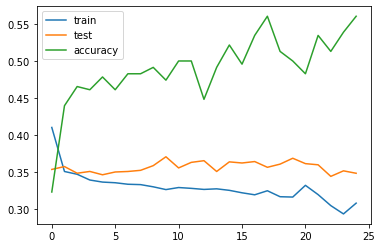

In [151]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.legend()
pyplot.show()

In [137]:
#print(X_test[0])
#check = X_test[0].reshape((1, 100, 34))
#print(x_input)

In [138]:
#pred = model.predict(check)
#print(Y_test[0])
#print(pred)

In [139]:
check2 = X_test.reshape((X_test.shape[0], X.shape[1], X.shape[2]))
predictions = model.predict(check2)
print(predictions.shape)
for i in range(predictions.shape[0]):
    if (predictions[i][0] >= predictions[i][1] and predictions[i][0] >= predictions[i][2]):
        predictions[i] = [1, 0, 0]
    elif (predictions[i][1] >= predictions[i][0] and predictions[i][1] >= predictions[i][2]):
        predictions[i] = [0, 1, 0]
    else:
        predictions[i] = [0, 0, 1]


        
count = 0
for i in range(predictions.shape[0]):
    if(predictions[i][0] == (Y_test[i][0]) and predictions[i][1] == (Y_test[i][1]) and predictions[i][2] == (Y_test[i][2]) ):
        count = count + 1
print('After the predictions has been estimated, the accuracy is ' + str((count/predictions.shape[0])*100) + ' %')

(58, 3)
After the predictions has been estimated, the accuracy is 41.37931034482759 %
